### Simple Kalman Filter

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
class KalmanFilterClass(object):
    def __init__(self,name='kf',dt=0.05,q_x=0.1,q_v=0.1,r_y=1.0,y_init=0.0):
        self.name = name
        self.dt = dt
        self.q_x = q_x
        self.q_v = q_v
        self.r_y = r_y
        self.y_init = y_init
        # Initialize some internal variables
        self.Q = np.array([[self.q_x,0],[0,self.q_v]])
        self.R = np.array(self.r_y)
        self.H = np.array([[1,0]])
        self.F = np.array([[1,self.dt],[0,1]])
        #
        self.x_hat = np.array([[self.y_init],[0]])
        self.P_hat = self.Q
        self.y = self.y_init
        
    # Update Kalman Filter
    def update(self,y):
        x_hat_m = np.matmul(self.F,self.x_hat)
        P_hat_m = np.matmul(np.matmul(self.F,self.P_hat),self.F.T) + self.Q
        W = np.linalg.inv(np.matmul(np.matmul(self.H,P_hat_m),self.H.T)+self.R)
        K = np.matmul(np.matmul(P_hat_m, self.H.T),W)
        # Update
        self.x_hat = self.x_hat + np.matmul(K,y-np.matmul(self.H,x_hat_m))
        self.P_hat = P_hat_m - np.matmul(np.matmul(K,self.H),P_hat_m)
print ("Done.")

Done.


### Test Kalman Filter

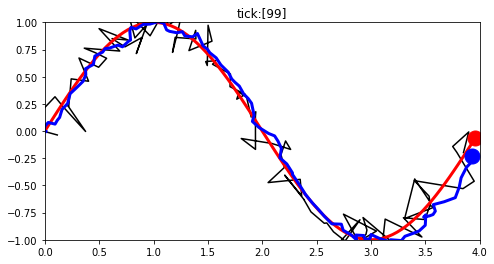

In [28]:
K_x1 = KalmanFilterClass(name='x1',dt=0.05,q_x=0.1,q_v=0.1,r_y=2.0,y_init=0.0)
K_x2 = KalmanFilterClass(name='x2',dt=0.05,q_x=0.1,q_v=0.1,r_y=2.0,y_init=0.0)

max_tick = 100
y_traj = np.zeros(shape=(max_tick,2))
y_noise_traj = np.zeros(shape=(max_tick,2))
y_filter_traj = np.zeros(shape=(max_tick,2))
for tick in range(max_tick):
    y1 = tick / 25
    y2 = np.sin(2.0*np.pi*tick/100.0)
    y_traj[tick,0],y_traj[tick,1] = y1,y2 # ground truth
    # Inject noise
    y1_noise = y1 + 0.1*np.random.randn(1)
    y2_noise = y2 + 0.1*np.random.randn(1)
    y_noise_traj[tick,0],y_noise_traj[tick,1] = y1_noise,y2_noise
    # Kalman filter
    K_x1.update(y=y1_noise)
    K_x2.update(y=y2_noise)
    # Use predicted position
    y1_filtered = K_x1.x_hat[0] + K_x1.x_hat[1]*K_x1.dt*2
    y2_filtered = K_x2.x_hat[0] + K_x2.x_hat[1]*K_x2.dt*2
    y_filter_traj[tick,0],y_filter_traj[tick,1] = y1_filtered,y2_filtered
    
# Plot 
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(y_noise_traj[:tick,0],y_noise_traj[:tick,1],'k-')    
ax.plot(y_traj[:tick,0],y_traj[:tick,1],'r-',linewidth=3)
ax.plot(y1,y2,'ro',ms=15)
ax.plot(y1_filtered,y2_filtered,'bo',markersize=15,linewidth=5)
ax.plot(y_filter_traj[:tick,0],y_filter_traj[:tick,1],'b-',linewidth=3)
ax.set_title("tick:[%d]"%(tick))
ax.set_aspect('equal')
ax.set_xlim([0,4])
ax.set_ylim([-1,+1])
plt.show()